# Hello STL file
Simple script to read and display a STL file.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gzip
import numpy as np
from stl import mesh
import vtkplotlib as vpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from io import BytesIO

load compressed stl file

In [3]:
with gzip.open('data/Molar2.stl.gz', 'rb') as f:
    file_bytes = BytesIO(f.read()) # read gzip into bytes data
    my_mesh = mesh.Mesh.from_file('Molar2.stl', fh=file_bytes) # note: the 'Molar2.stl' seems optional

In [4]:
my_mesh.vectors.shape

(61820, 3, 3)

unfortunaley this doesn't seem to work :(

In [5]:
%matplotlib inline

# Create a new plot
figure = plt.figure()
axes = Axes3D(figure)
# axes = fig.add_subplot(111, projection='3d')

# add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(my_mesh.vectors))
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(my_mesh.vectors, color='lightgrey'))

# Auto scale to the mesh size
scale = my_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
# plt.savefig('bar.png')  # this saves a blank image :(
plt.show()


<Figure size 640x480 with 0 Axes>

FWIW, you can save save the stl file properly

In [6]:
# my_mesh.save('foo.stl')

Plot the mesh using vtkplotlib.  
This works but opens up in a separate window, and you have to shutdown python in order to close the window.

In [7]:
vpl.mesh_plot(my_mesh)

# Show the figure
vpl.show()

## playing around with 3D figure

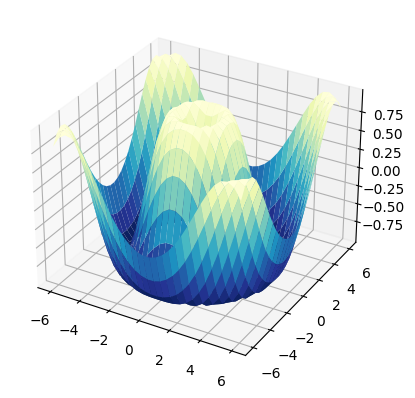

In [8]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)
plt.show()

In [9]:
v = my_mesh.vectors
v.shape

(61820, 3, 3)

In [10]:
x = v[0]
y = v[1]
X, Y = np.meshgrid(x, y)
Z = v[3]

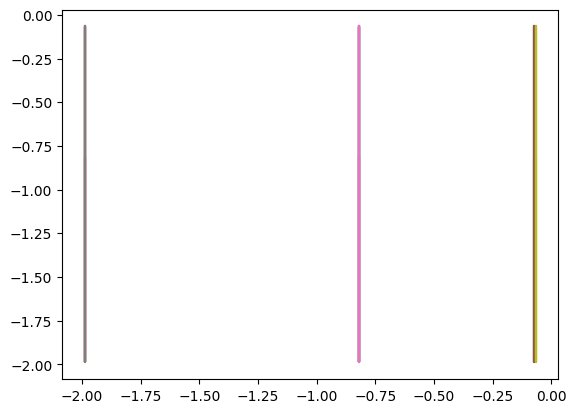

In [11]:
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax = fig.add_subplot(111)

# Plot the surface.
# ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)
ax.plot(X, Y)
plt.show()